# Data frame analysis

This notebook aims to explain how to deal with information we have abour boundary of a grain to calculate the GB energy with Wield

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:

folder = "../data/"
file = "1_005"
path = folder + file

#%%

sample = np.loadtxt(path+ ".txt")

'''
# Column 1-3:   right hand average orientation (phi1, PHI, phi2 in radians)
# Column 4-6:   left hand average orientation (phi1, PHI, phi2 in radians)
# Column 7:     Misorientation Angle
# Column 8-10:  Misorientation Axis in Right Hand grain
# Column 11-13: Misorientation Axis in Left Hand grain
# Column 14:    length (in microns)
# Column 15:    trace angle (in degrees)
# Column 16-19: x,y coordinates of endpoints (in microns)
# Column 20-21: IDs of right hand and left hand grains

'''


df = pd.DataFrame(  data = sample, 
                    columns = ["right_phi1","right_PHI","right_phi2",                 #1-3
                               "left_phi1","left_PHI","left_phi2",                    #4-6 
                               "ori_angle",                                           #7
                               "right_ori_x","right_ori_y","right_ori_z",              #8-10
                               "left_ori_x","leff_ori_y","left_ori_z",                 #11-13  
                               "length",                                              #14
                               "trace_angle",                                         #15
                               "x_start", "y_start", "x_end", "y_end",                #16-19
                               "grain_right","grain_left"                             #20-21
                               ]                    
                 )


In [32]:
df[(df['grain_right'] == 2) | (df['grain_left'] == 2)]

,right_phi1,right_PHI,right_phi2,left_phi1,left_PHI,left_phi2,ori_angle,right_ori_x,right_ori_y,right_ori_z,...,leff_ori_y,left_ori_z,length,trace_angle,x_start,y_start,x_end,y_end,grain_right,grain_left
61,2.363,0.886,4.240,3.569,0.749,2.910,49.37,-1.0,-6.0,4.0,...,-6.0,4.0,13.317,85.7,1.0,14.43,2.0,1.15,37.0,2.0
62,3.569,0.749,2.910,5.002,0.349,1.754,44.66,-11.0,4.0,-2.0,...,4.0,-2.0,14.468,94.0,1.0,14.43,2.0,28.87,2.0,64.0
172,3.569,0.749,2.910,2.108,0.507,4.677,55.15,-12.0,-10.0,-9.0,...,-10.0,-9.0,1.155,30.0,2.0,1.15,3.0,0.58,2.0,1.0
173,0.858,0.219,5.426,3.569,0.749,2.910,45.52,-20.0,5.0,-11.0,...,5.0,-11.0,15.011,2.2,2.0,28.87,17.0,28.29,79.0,2.0
174,0.858,0.219,5.426,3.569,0.749,2.910,45.52,-20.0,5.0,-11.0,...,5.0,-11.0,24.331,154.7,17.0,28.29,39.0,38.68,79.0,2.0
458,3.569,0.749,2.910,6.271,0.745,0.120,12.89,14.0,-22.0,9.0,...,-22.0,9.0,16.042,4.1,39.0,38.68,55.0,37.53,2.0,100.0
533,2.559,0.670,3.099,3.569,0.749,2.910,50.30,-1.0,22.0,-20.0,...,22.0,-20.0,8.327,43.9,55.0,37.53,61.0,31.75,80.0,2.0
556,3.569,0.749,2.910,2.018,0.603,3.631,49.02,7.0,20.0,17.0,...,20.0,17.0,8.327,76.1,61.0,31.75,63.0,23.67,2.0,73.0
570,3.569,0.749,2.910,2.331,0.963,3.921,37.79,-4.0,19.0,-1.0,...,19.0,-1.0,17.321,90.0,63.0,23.67,63.0,6.35,2.0,38.0
571,3.569,0.749,2.910,2.331,0.963,3.921,37.79,-4.0,19.0,-1.0,...,19.0,-1.0,8.327,43.9,63.0,6.35,69.0,0.58,2.0,38.0


In [33]:
df[(df['grain_right'] == 2)]

,right_phi1,right_PHI,right_phi2,left_phi1,left_PHI,left_phi2,ori_angle,right_ori_x,right_ori_y,right_ori_z,...,leff_ori_y,left_ori_z,length,trace_angle,x_start,y_start,x_end,y_end,grain_right,grain_left
62,3.569,0.749,2.91,5.002,0.349,1.754,44.66,-11.0,4.0,-2.0,...,4.0,-2.0,14.468,94.0,1.0,14.43,2.0,28.87,2.0,64.0
172,3.569,0.749,2.91,2.108,0.507,4.677,55.15,-12.0,-10.0,-9.0,...,-10.0,-9.0,1.155,30.0,2.0,1.15,3.0,0.58,2.0,1.0
458,3.569,0.749,2.91,6.271,0.745,0.120,12.89,14.0,-22.0,9.0,...,-22.0,9.0,16.042,4.1,39.0,38.68,55.0,37.53,2.0,100.0
556,3.569,0.749,2.91,2.018,0.603,3.631,49.02,7.0,20.0,17.0,...,20.0,17.0,8.327,76.1,61.0,31.75,63.0,23.67,2.0,73.0
570,3.569,0.749,2.91,2.331,0.963,3.921,37.79,-4.0,19.0,-1.0,...,19.0,-1.0,17.321,90.0,63.0,23.67,63.0,6.35,2.0,38.0
571,3.569,0.749,2.91,2.331,0.963,3.921,37.79,-4.0,19.0,-1.0,...,19.0,-1.0,8.327,43.9,63.0,6.35,69.0,0.58,2.0,38.0


In [36]:
df[(df['grain_right'] == 100)]

,right_phi1,right_PHI,right_phi2,left_phi1,left_PHI,left_phi2,ori_angle,right_ori_x,right_ori_y,right_ori_z,...,leff_ori_y,left_ori_z,length,trace_angle,x_start,y_start,x_end,y_end,grain_right,grain_left
409,6.271,0.745,0.12,0.858,0.219,5.426,36.96,18.0,-6.0,5.0,...,-6.0,5.0,13.614,42.7,29.0,47.92,39.0,38.68,100.0,79.0
462,6.271,0.745,0.12,3.202,0.343,3.108,28.15,-17.0,0.0,3.0,...,0.0,3.0,27.301,171.5,40.0,61.20,67.0,65.24,100.0,133.0
463,6.271,0.745,0.12,3.202,0.343,3.108,28.15,-17.0,0.0,3.0,...,0.0,3.0,9.165,70.9,67.0,65.24,70.0,56.58,100.0,133.0
532,6.271,0.745,0.12,2.559,0.670,3.099,40.34,-3.0,12.0,13.0,...,12.0,13.0,11.136,128.9,55.0,37.53,62.0,46.19,100.0,80.0
566,6.271,0.745,0.12,0.695,0.562,6.276,36.48,7.0,-20.0,-20.0,...,-20.0,-20.0,13.115,127.6,62.0,46.19,70.0,56.58,100.0,103.0


In [65]:
df[(df['grain_right'] == 2)].iloc[:,6:13]

,ori_angle,right_ori_x,right_ori_y,right_ori_z,left_ori_x,leff_ori_y,left_ori_z
62,44.66,-11.0,4.0,-2.0,-11.0,4.0,-2.0
172,55.15,-12.0,-10.0,-9.0,-12.0,-10.0,-9.0
458,12.89,14.0,-22.0,9.0,14.0,-22.0,9.0
556,49.02,7.0,20.0,17.0,7.0,20.0,17.0
570,37.79,-4.0,19.0,-1.0,-4.0,19.0,-1.0
571,37.79,-4.0,19.0,-1.0,-4.0,19.0,-1.0


<AxesSubplot:>

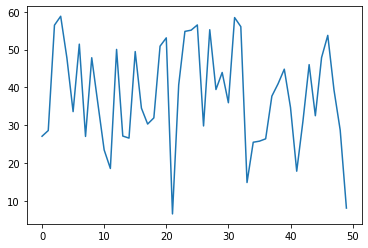

In [53]:
df.head(50).ori_angle.plot.line()

As I have the misorientation angle. Can I position grains as [1 1 0] and [1 1 0] and then set theta equal to disorientation angle?

### Applying Euler Angles to Wield

15

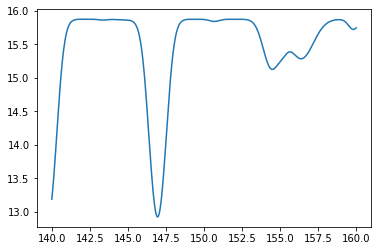

In [14]:

ref = np.loadtxt("output_py.ref")
plt.plot(ref[:,0],ref[:,1])
plt.show()


In [13]:
theta = 90
csl = 1
csls = []


## Fill grains